<a href="https://colab.research.google.com/github/Rishit-dagli/MIRNet-TFJS/blob/main/MIRNet_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> MIRNet Inference</h1>

This notebook shows the the process of inferencing for the **MIRNet** model as proposed by [Learning Enriched Features for Real Image Restoration and Enhancement](https://arxiv.org/pdf/2003.06792v2.pdf) by Zamir et al. This model is capable of enhancing low-light images upto a great extent.

<h2>A bit about the architecture</h2>

The MIRNet presents a novel architecture with the collective goals of maintaining high-resolution representations through the entire network, and
receiving strong contextual information from the low-resolution representations.

The core of this approach is a multi-scale residual block containing the following key elements:
- parallel multi-resolution convolution streams for extracting multi-scale features
- information exchange across the multi-resolution streams
- spatial and channel attention mechanisms for capturing contextual information
- attention based multi-scale feature aggregation.

![](https://i.imgur.com/VOzfG9a.png)
<p align="center">
<small>Framework of MIRNet</small>
</p>

The figure above shows the framework of the proposed network MIRNet that learns enriched feature representations for image restoration and enhancement.

<h2>Examples</h2>

<p align="center">
<img src="https://github.com/soumik12345/MIRNet/raw/master/assets/lol_results.gif"</img><br>
<small><a href="https://github.com/soumik12345/MIRNet/blob/master/assets/lol_results.gif">Source</a></small>
</p>

Model training code and pre-trained weights are provided by Soumik through [this repository](https://github.com/soumik12345/MIRNet/).

## Setup

In [1]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 213 (delta 94), reused 148 (delta 40), pack-reused 0
Receiving objects: 100% (213/213), 28.12 MiB | 18.04 MiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/MIRNet


In [9]:
!pip install -q wandb

     |████████████████████████████████| 1.8MB 8.0MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 163kB 28.6MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 133kB 20.0MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 


In [10]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np

## Download dataset and pre-trained weights

In [11]:
download_dataset('LOL')

Downloading...
From: https://drive.google.com/uc?id=157bjO1_cFuSd0HWDUuAmcHRJDVyWpOxB
To: /content/MIRNet/LOLdataset.zip
347MB [00:03, 106MB/s] 


Unpacking Dataset
Done!!!


In [3]:
inferer = Inferer()
inferer.download_weights('1UCW9uBMBsd9EiK68nN_6ZlsEJE3kRD3m')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)

Downloading...
From: https://drive.google.com/uc?id=1UCW9uBMBsd9EiK68nN_6ZlsEJE3kRD3m
To: /content/MIRNet/low_light_weights_best.h5
148MB [00:01, 84.9MB/s]


### Understand the model using:

1. Model Summary which allows us to view:

- Name and type of all layers in the model.
- Output shape for each layer.
- Number of weight parameters of each layer.
- The inputs each layer receives
- The total number of trainable and non-trainable parameters of the model.

2. Plotting the model by converting it to dot format.

In [4]:
inferer.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, None, None, 6 36928       conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
dot_img_file_path = "/tmp/model.png" #@param {type:"string"}
tf.keras.utils.plot_model(inferer.model, 
                          to_file = dot_img_file_path, 
                          show_shapes=True)

## Inference

The inference code is adapted from Sayak Paul though [this repository](https://github.com/sayakpaul/MIRNet-TFLite-TRT)

In [15]:
IMG_SIZE = 400
LOW_LIGHT_IMGS = glob('./eval15/low/*')

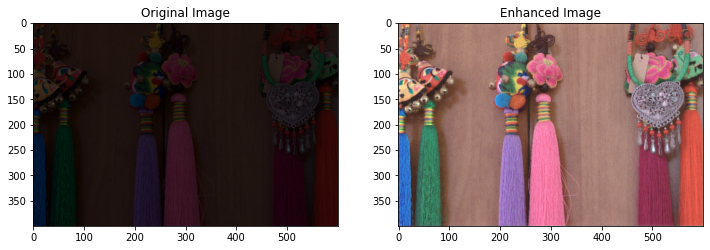

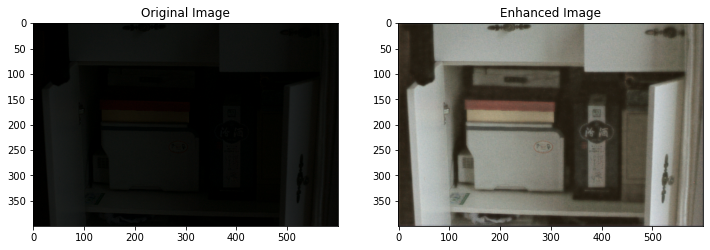

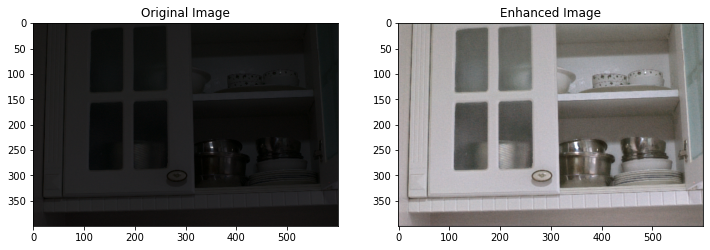

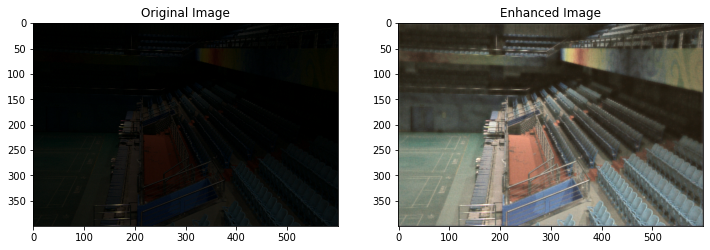

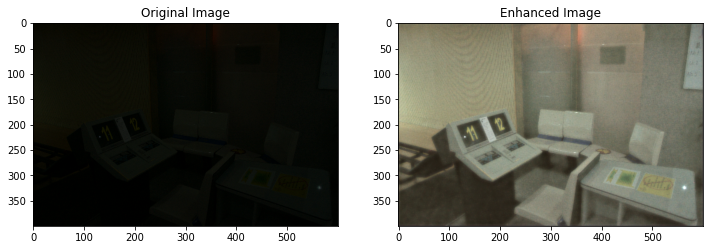

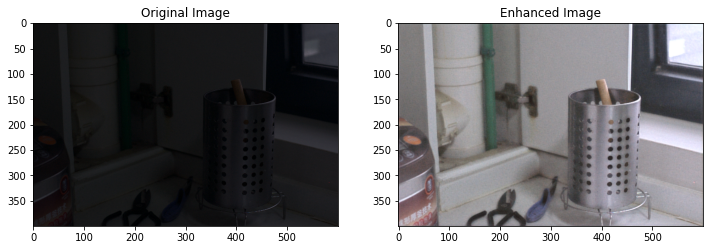

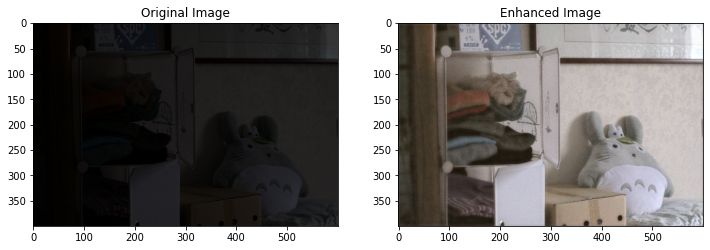

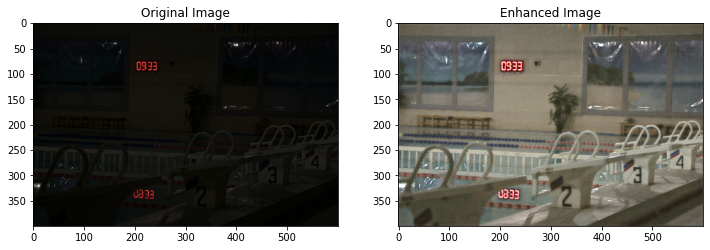

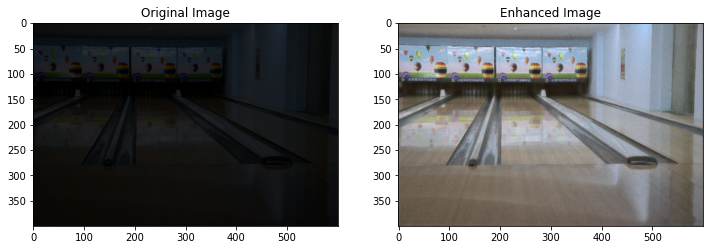

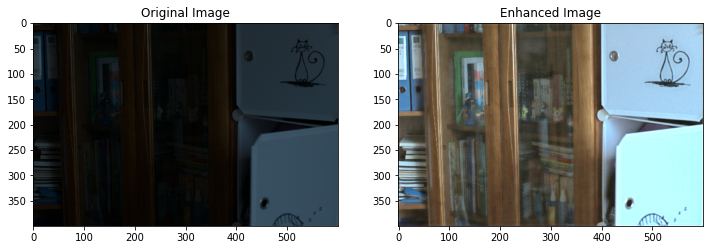

In [17]:
for image_path in LOW_LIGHT_IMGS[:10]:
    original_image, output_image = inferer.infer(image_path)
    plot_result(original_image, output_image)